# Проектная работа
## Описание работы
По данным о заведениях общественного питания Москвы мы должны проанализировать тип заведения, место, количество мест для нового заведения с роботами. На основе проделанного анализа сделаем выводы и подготовим наглядную презентацию для инвесторов
###  План работы
####  Анализ данных
* <a href="#1">[1. Импортирование библиотек, изучение предоставленных данных.]</a>
* <a href="#2">[2.Изучение cоотношения видов объектов общественного питания по количеству.]</a>
* <a href="#3">[3. Изучение соотношения сетевых и несетевых заведений по количеству.]</a>
* <a href="#4">[4. Выявление характерных черт для сетевых объектов.]</a>
* <a href="#5">[5. Среднее количество посадочных мест для каждого типа заведений.]</a>
* <a href="#6">[6. Анализ улиц.]</a>

#### Вывод
* <a href="#3.1">[Вывод]</a>

## Импортирование библиотек, изучение предоставленных данных
<a name="1"></a>

Выпишем необходимые библиотеки и посмотрим таблицу

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from nltk.stem import SnowballStemmer
from pymystem3 import Mystem
m = Mystem()
russian_stemmer=SnowballStemmer('russian')

In [2]:
rest_data=pd.read_csv('/datasets/rest_data.csv')
display(rest_data.info())
rest_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


На первый взгляд стоит привести названия объектов к нижему регистру, сделаем это позже. Начнем изучение данных

In [3]:
rest_data.loc[:,'object_name':'number'].duplicated().sum()

82

В некоторых ячейках указано сразу несколько заведений, я думаю они и повторяются столько раз, сколько названий заведений в ячейке(заведения находятся в одном помещении или находятся очень рядом). Удалять названия не стоит, это не влияет сильно на результаты группировки по названиям и не влияет на количество типов заведений.


## Изучение cоотношения видов объектов общественного питания по количеству
<a name="2"></a>

Посмотрим, как распределены объекты по типам

In [4]:
object_type_count=rest_data.groupby('object_type',as_index=False).agg({'id':'count'}).sort_values('id',ascending=False)
object_type_count['percentage']=(object_type_count['id']/
                                 object_type_count['id'].sum()*100).round(1).astype('str')+'%'
object_type_count

,object_type,id,percentage
3,кафе,6099,39.7%
8,столовая,2587,16.8%
7,ресторан,2285,14.9%
6,предприятие быстрого обслуживания,1923,12.5%
0,бар,856,5.6%
1,буфет,585,3.8%
4,кафетерий,398,2.6%
2,закусочная,360,2.3%
5,магазин (отдел кулинарии),273,1.8%


Построим гистограмму

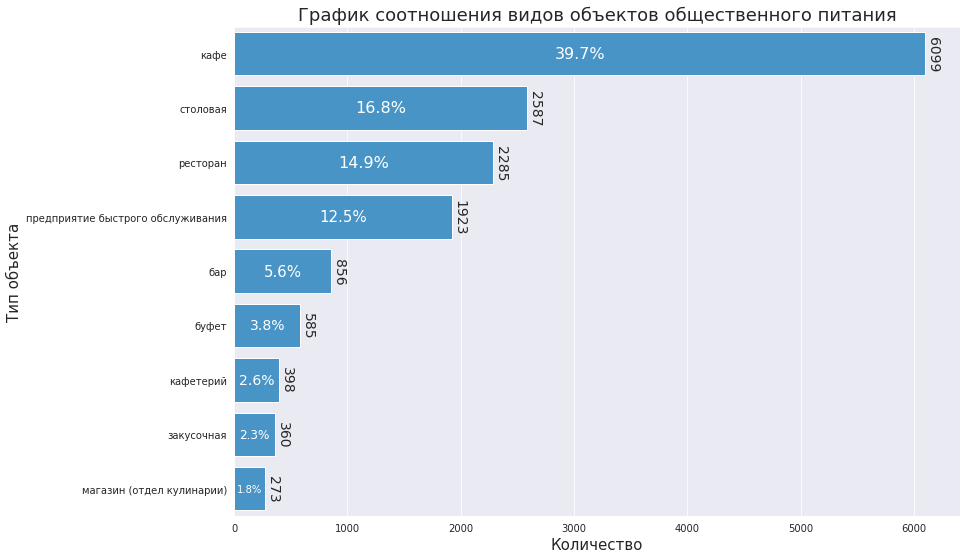

In [5]:
plt.figure(figsize=(13,9))
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set_style("darkgrid") 

ax= sns.barplot(x='id',y='object_type',data=object_type_count,color='#3498db')
rects=ax.patches
labels=object_type_count['id']
labels_2=object_type_count['percentage']

fontsize_=[16,16,16,15,15,14,14,12,10,8]
for rect, label,label2 in zip(rects, labels,labels_2):
    height = rect.get_width()
    ax.text(height+5,rect.get_y()+rect.get_height() / 2, label,fontsize=14,
            va='center',rotation=-90)
    ax.text(height/2,rect.get_y()+rect.get_height() / 2, label2,
            ha='center',va='center',fontsize=fontsize_[0],color='white')
    del fontsize_[0]
plt.ylabel('Тип объекта',fontsize=15)
plt.xlabel('Количество',fontsize=15)
plt.title('График соотношения видов объектов общественного питания',fontsize=18)
plt.show()

Видим, что самый распространенный вариант объекта- кафе. Кафе составляют почти 40% от всего рынка и имеет подавляющее преимущество. Далее идет тройка: столовая, ресторан и предприятие быстрого обслуживания. В фаст фуде смешаны понятия кафе, ресторана и предприятие быстрого обслуживания, так что некоторый фаст фуд относится к кафе и ресторанам (предприятий быстрого обсуживания на самом деле больше)

## Изучение соотношения сетевых и несетевых заведений по количеству
<a name="3"></a>

Сгруппируем данные по сетевым и нет объектам

In [6]:
is_chain=rest_data.groupby('chain',as_index=False).agg({'object_name':'count'}).sort_values('object_name',ascending=False)
is_chain['percents']=round(is_chain['object_name']/is_chain['object_name'].sum()*100,1).astype('str')+'%'

In [7]:
chain_object_type=rest_data.groupby(['object_type','chain'],as_index=False).agg(
    {'address':'count'}).sort_values('address',ascending=False)

Построим гистограммы

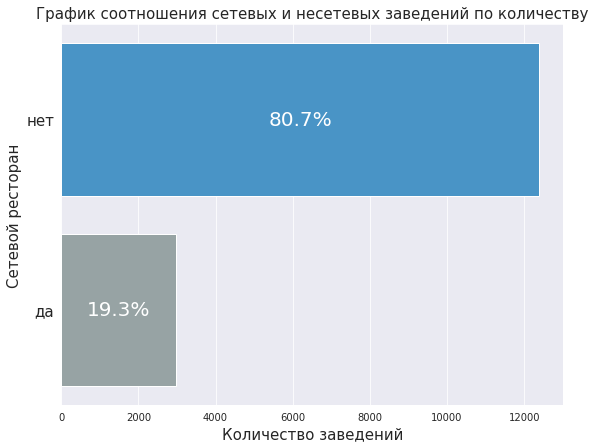

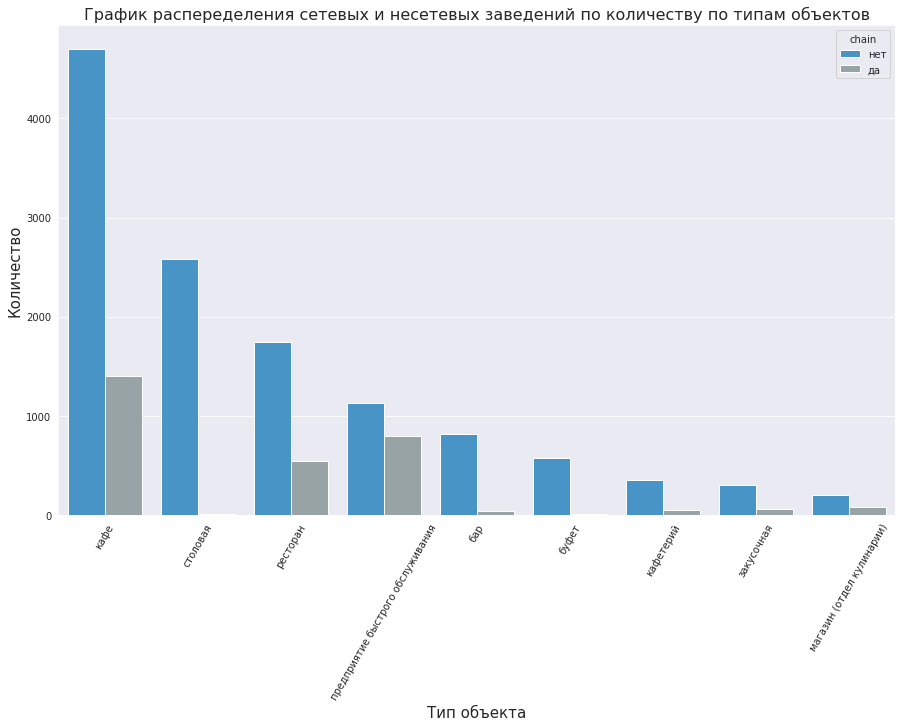

In [8]:
plt.figure(figsize=(9,7))
ax=sns.barplot(x='object_name',y='chain',data=is_chain,palette=('#3498db','#95a5a6'))
rects=ax.patches
labels=is_chain['percents']
for rect, label in zip(rects, labels):
    height = rect.get_width()
    ax.text(height/2,rect.get_y()+rect.get_height() / 2, label,
            ha='center',va='center',fontsize=20,color='white')
plt.ylabel('Сетевой ресторан',fontsize=15)
plt.xlabel('Количество заведений',fontsize=15)
plt.title('График соотношения сетевых и несетевых заведений по количеству',fontsize=15)
plt.setp(plt.yticks()[1],fontsize=15);
plt.show()
print('\n\n')

b=plt.figure(figsize=(15,9))
sns.barplot(x='object_type',y='address', data=chain_object_type,hue='chain',palette=('#3498db','#95a5a6'))
plt.setp(plt.xticks()[1],rotation=60,fontsize=10);
plt.ylabel('Количество',fontsize=15)
plt.xlabel('Тип объекта',fontsize=15)
plt.title('График распеределения сетевых и несетевых заведений по количеству по типам объектов',fontsize=16)
plt.show()

Заметим, что одиночных объектов в 4 раза больше. Столовые, бары, кафетерии, закусочные редно становятся сетевыми. Посмотрим, у каких объектов есть наибольший шанс стать сетевым.

In [9]:
chain_object_type=chain_object_type.merge(chain_object_type.groupby('object_type',as_index=False).agg({
    'address':'sum'}), on='object_type')
chain_object_type['perc']=round(chain_object_type.address_x/chain_object_type.address_y*100,1)
perc_chain=chain_object_type[chain_object_type['chain']=='да'][['object_type','perc']].sort_values('perc',ascending=False)
perc_chain.columns=["Тип объекта","Процент сетевых"]

In [10]:
perc_chain

,Тип объекта,Процент сетевых
7,предприятие быстрого обслуживания,41.1
17,магазин (отдел кулинарии),28.6
5,ресторан,23.8
1,кафе,22.9
15,закусочная,15.6
13,кафетерий,13.1
9,бар,4.3
11,буфет,1.9
3,столовая,0.1


Предприятие быстрого обслуживания имеет успех расширения 41%. Далее идут магазины, но они составляют 1.8% от рынка. Рестораны и кафе имеют шанс расширения в 2 раза меньше фаст фуда.

## Выявление характерных черт для сетевых объектов
<a name="4"></a>

Выясним характерыне черты сетевых объектов. Для это сгруппируем данные по названию сети

In [11]:
rest_data_chain=rest_data[rest_data['chain']=='да']

Так как многие названия одной и той же сети написаны по-разному, приведем все к нижнему регистру, уберем кавычки, и возьмем только последние слова из названий(это поможет сгруппировать часть заведений)

In [12]:
rest_data_chain['object_name']=rest_data_chain['object_name'].str.lower().str.replace('[«»]',
                                '').map(lambda x: m.lemmatize(x)[-2])

In [13]:
rest_data_chain=rest_data_chain[rest_data_chain['number']>5].groupby('object_name',as_index=False).agg({'address':'count','number':'mean'})

In [14]:
rest_data_chain['address'].describe()

count    271.000000
mean       9.490775
std       24.999832
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      183.000000
Name: address, dtype: float64

Все равно много единичных элементов. Уберем их и заведения с малым количеством мест(в том числе, где количество меньше 1, выбросы либо заведения, подобные шаурмичной)

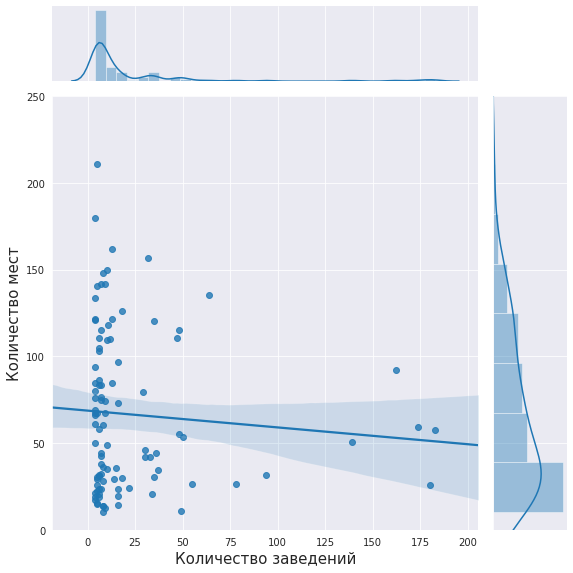

In [15]:
rest_data_chain=rest_data_chain[np.logical_and(rest_data_chain['address']>3,
                                               rest_data_chain['number']>5)]
sns.jointplot(data=rest_data_chain,x='address',y='number',kind='reg',height=8,ylim=(0,250));
plt.xlabel('Количество заведений',fontsize=15);
plt.ylabel('Количество мест',fontsize=15);
plt.show();

Очень много сетей, с количеством ресторанов меньше 10. Открывают заведений больше, если сеть уже начала пользоваться успехом.
Количество мест больше всего около 20-30. Исследуем самые популярные сети. *Приоритетной для сети будет ситуация мало мест, мало заведений.*

## Среднее количество посадочных мест для каждого типа заведений
<a name="5"></a>

Рассмотрим среднее число мест в разных типах объектов

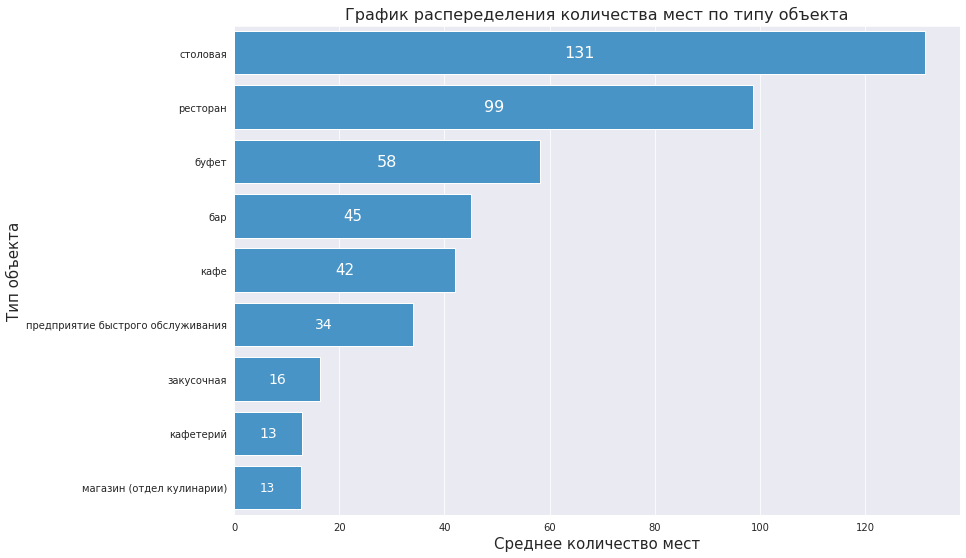

In [16]:
plt.figure(figsize=(13,9))
temporary=rest_data[rest_data['number']>1].groupby('object_type',as_index=False).agg({'number':
                        'mean'}).sort_values('number',ascending=False)
ax=sns.barplot(x='number',y='object_type',
               data=temporary,color='#3498db')
rects=ax.patches
labels=temporary['number'].round(0).astype('int')
fontsize_=[16,16,16,15,15,14,14,14,12,10]
for rect, label in zip(rects, labels):
    height = rect.get_width()
    ax.text(height/2,rect.get_y()+rect.get_height() / 2, label,
            ha='center',va='center',fontsize=fontsize_[0],color='white')
    del fontsize_[0]
plt.xlabel('Среднее количество мест',fontsize=15)
plt.ylabel('Тип объекта',fontsize=15)
plt.title('График распеределения количества мест по типу объекта',fontsize=16)
plt.show()

Заметим, что фаст фуд в среднем имеет 34  места. Столовые и рестораны имеют большое количество в силу того, что обычно они занимают большую площадь. Кафетерии, магазины, закусочные имеют маленькую площадь и, следовательно, имеют мало мест для посетителей

##  Анализ улиц
<a name="5"></a>

Посмотрим распредение ресторанов по улицам и выявим самые популярные улицы

In [17]:
rest_data['st']=rest_data['address'].str.extract(
    '(([A-zА-я0-9\sёЁ -]+)?(улица|шоссе|переулок|проезд|бульвар|проспект)([ ЁёA-zА-я0-9\s-]+)?)')[0].str.replace(' ','').str.lower()


In [18]:
rest_data

,id,object_name,chain,object_type,address,number,st
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улицаегораабакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улицаталалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановскаяулица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевскаяулица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевскаяулица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-йкрутицкийпереулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улицаземлянойвал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улицаземлянойвал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,киевскоешоссе


In [19]:
rest_data_st=rest_data.groupby('st',as_index=False).agg({'address':'count'}).sort_values('address',ascending=False)
rest_data_st_top10=rest_data_st.head(10)
rest_data_st_sing=rest_data_st[rest_data_st['address']==1]
display(rest_data_st_top10)
print('Улиц с одним рестораном: {0}, Улиц всего: {1}'.format(rest_data_st_sing['address'].count(),rest_data['st'].nunique()))

,st,address
995,проспектмира,204
999,профсоюзнаяулица,183
656,ленинградскийпроспект,173
389,варшавскоешоссе,165
659,ленинскийпроспект,148
991,проспектвернадского,132
646,кутузовскийпроспект,114
582,каширскоешоссе,112
588,кировоградскаяулица,110
1714,ходынскийбульвар,102


Улиц с одним рестораном: 521, Улиц всего: 1787


Самыми популярными улицами являются улицы, по которым добираются в центр/ из центра и имеют большую протяженность. Короткие улицы в спальных районах, нелюдных местах имеют меньше всего заведений. Изучим количество мест в заведениях на самых популярных улицах

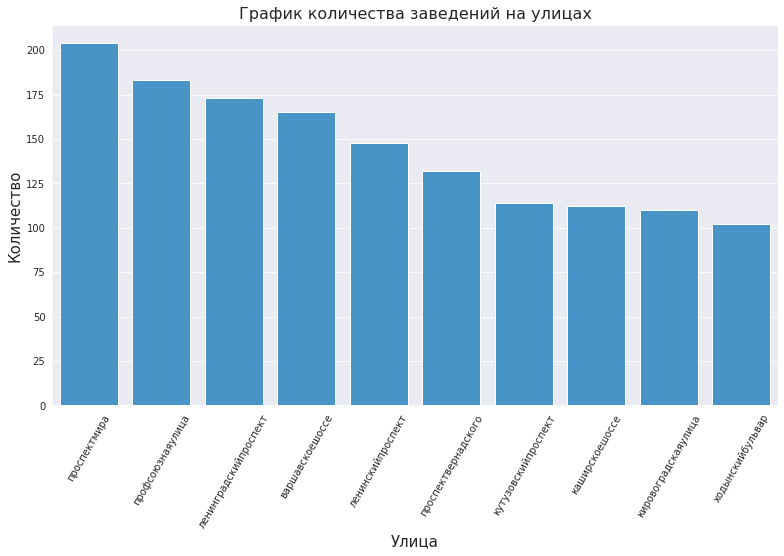

In [20]:
k=plt.figure(figsize=(13,7))
sns.barplot(x='st',y='address', data=rest_data_st_top10,color='#3498db')
plt.setp(plt.xticks()[1],rotation=60,fontsize=10);
plt.ylabel('Количество',fontsize=15)
plt.xlabel('Улица',fontsize=15)
plt.title('График количества заведений на улицах',fontsize=16)
plt.show()

Лучшим районом для открытия сети является ЮЗАО. В нем находятся Профсоюзная, Ленинский проспект, проспект Вернадского, часть Варшавского шоссе. Одинокие заведения чаще всего находятся на маленьких улицах в Центральном районе.

Выявим самый популярный район (для предотвращение ошибок из-за пробелов и заглавных букв уберем пробелы и заглавные буквы)

In [21]:
from io import BytesIO
import requests
spreadsheet_id = '1N0UjvPNlUO9L67KWNiKsjbcHFC0HyLNqqhY4as3ulDw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content), sep=',')
df=df[['streetname','okrug']]
df['streetname']=df['streetname'].str.replace(' ','').str.lower()
df.head()

,streetname,okrug
0,выставочныйпереулок,ЦАО
1,улицагашека,ЦАО
2,большаяникитскаяулица,ЦАО
3,глубокийпереулок,ЦАО
4,большойгнездниковскийпереулок,ЦАО


Некоторые улицы принадлежат сразу к нескольким округам, для это выделим самый распространенный округ для каждой улицы.

In [22]:
df=df.groupby(['streetname','okrug']).agg({'okrug':'count'})
df.columns=['count']
df=df.reset_index().sort_values('count',ascending=False)
dd=[]
for row in df.streetname.unique():
    dd.append(df[(df['streetname']==row)].head(1)[['streetname','okrug']].values)
dd=list(map(lambda x: x[0],dd))
street_reg=pd.DataFrame(dd,columns=['streetname','okrug'])
rest_data_st=rest_data_st.merge(street_reg,how='left',left_on='st',right_on='streetname').sort_values('address',ascending=False)
rest_data_st.head(5)

,st,address,streetname,okrug
0,проспектмира,204,проспектмира,СВАО
1,профсоюзнаяулица,183,профсоюзнаяулица,ЮЗАО
2,ленинградскийпроспект,173,ленинградскийпроспект,САО
3,варшавскоешоссе,165,варшавскоешоссе,ЮАО
4,ленинскийпроспект,148,ленинскийпроспект,ЮЗАО


Теперь выделим районы в которых находятся самые популярные улицы и с 1 рестораном на улицу


In [23]:
print('Районы с самыми популярными улицами:')
display(rest_data_st.head(10).groupby('okrug').agg({'address':'sum'}).sort_values('address',ascending=False))
rest_data_st_sing=rest_data_st[rest_data_st['address']==1]
print('\n\nРайоны с 1 рестораном на улицу')
display(rest_data_st_sing.groupby('okrug').agg({'address':'sum'}).sort_values('address',ascending=False).head(5))

Районы с самыми популярными улицами:


,address
okrug,
ЮАО,387
ЮЗАО,331
САО,275
ЗАО,246
СВАО,204




Районы с 1 рестораном на улицу


,address
okrug,
ЦАО,159
СВАО,61
ВАО,56
ЮВАО,51
САО,45


Оказывается, самым популярным оказался ЮАО ( Проспект Вернадского находится в ЗАО), после него, с небольшим отставанием идет ЮЗАО(все равно оставим в рекомендациях, в силу близости Проспекта Вернадского). Перерь точно видно, что в Центральном районе больше всего улиц с одним рестораном.  

In [24]:
rest_num=rest_data[np.logical_and(rest_data['st'].isin(rest_data_st_top10['st']),rest_data['number']>5)]
rest_num['number'].describe()

count    1178.000000
mean       69.168930
std        95.349375
min         6.000000
25%        24.000000
50%        45.000000
75%        86.000000
max      1700.000000
Name: number, dtype: float64

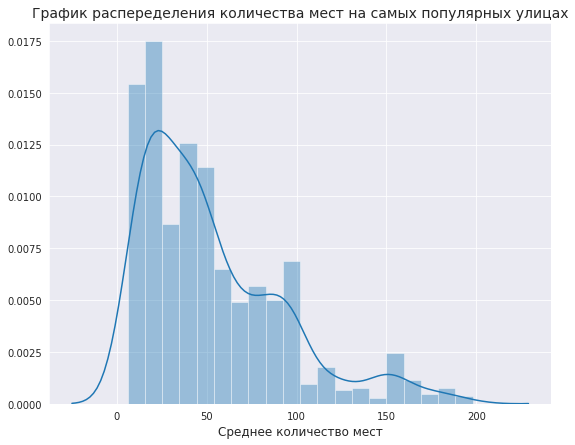

In [25]:
plt.figure(figsize=(9,7))
sns.distplot(rest_num[rest_num['number']<np.percentile(rest_num['number'],95)]['number'],bins=20)
plt.xlabel('Среднее количество мест',fontsize=12)
plt.title('График распеределения количества мест на самых популярных улицах',fontsize=14)
plt.show()

Распредение несильно отличнается от общей тенденции, однако мест стало побольше

## Вывод <a name="3.1"> </a>
Выяснили самые распространенные виды объектов: кафе составляют почти 40% от всего рынка и имеет подавляющее преимущество. Далее идет тройка: столовая, ресторан и предприятие быстрого обслуживания. После этого мы выявили, что самым удобным заведением для расширения являются заведения быстрого питания. Получили, что для сетевых объектов характерно малое количество мест(около 20) и малое количество объектов (менее 10). Вычислили среднее количество мест для каждого вида объектов. Получилось, что чем больше территория заведения, тем больше мест для посетителей. Так как наше заведение маленькое, то стоит смотреть на количество 20-30 мест. Выявили самые популярные улицы по количеству заведений и выделили самый популярный район- ЮЗАО. В Центральном районе на многих улицах находится не более 1 заведения. На популярных улицах количество посадочных мест в основном не превышает 100 ( в основном все около(30 и 50). 


## Рекомендации
При открытии нового заведения, я бы посоветовал сосредоточиться на заведении быстрого обслуживания. Они имеют большую долю на рынке и большой шанс на расширение сети. В качестве места советую выбрать улицы из топ 10. Хоть они и имеют большую конкуренцию, но являются очень проходимыми и заметными.Количество мест следует брать из диапазона 20-30. При успехе и дальнейшем расширении можно будет брать около 50. Открываться стоит в районе ЮЗАО, тк там находятся самые насыщенные заведениями улицы: Профстоюзная, Ленинский проспект, проспект Вернадского, часть Варшавского шоссе.  
Презентация https://yadi.sk/i/bUhbO6dMTjMw-g

,st,address
995,проспектмира,204
999,профсоюзнаяулица,183
656,ленинградскийпроспект,173
389,варшавскоешоссе,165
659,ленинскийпроспект,148
991,проспектвернадского,132
646,кутузовскийпроспект,114
582,каширскоешоссе,112
588,кировоградскаяулица,110
1714,ходынскийбульвар,102


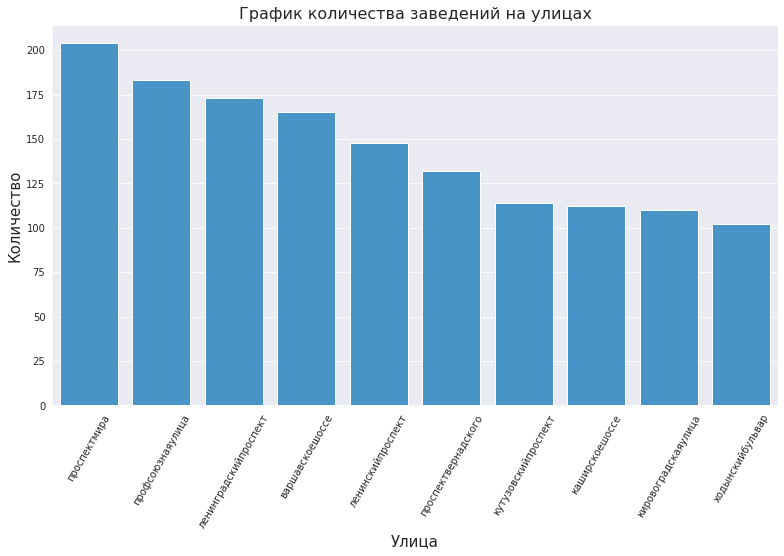

,Тип объекта,Процент сетевых
7,предприятие быстрого обслуживания,41.1
17,магазин (отдел кулинарии),28.6
5,ресторан,23.8
1,кафе,22.9
15,закусочная,15.6
13,кафетерий,13.1
9,бар,4.3
11,буфет,1.9
3,столовая,0.1


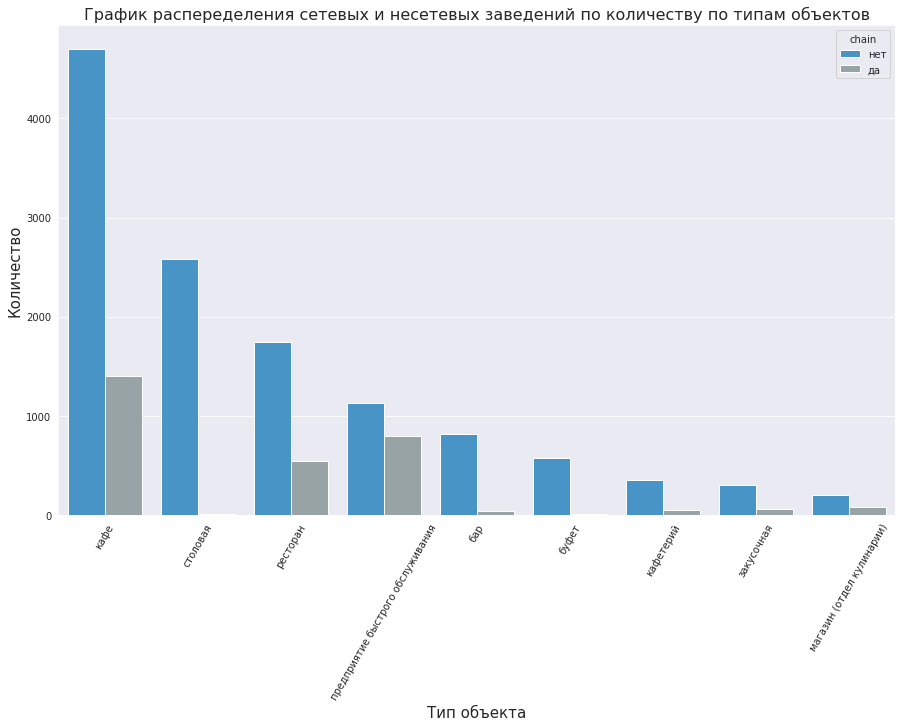

In [26]:
display(rest_data_st_top10)
display(k)
display(perc_chain)
display(b);